# Creating an animated scatterplot showing the correlation between life expectancy and fertility in 1960 - 2023
### Visualizing Animated in Python

## Introduction
A scatterplot effectively displays the correlation between life expectancy and fertility rates across different countries over the years. In the notebook below, by animating the scatterplot, we will dynamically show how these key indicators of development and population have evolved between 1960 to 2023, revealing trends that static visualizations might miss.

**Dataset:**
Gapminder is an independent foundation and provides the data publicly. We will download the data from [here](https://www.gapminder.org/data/) and take the datasets: "Population", "Life expectancy", and "Babies per woman" (fertility rate). We can also add continent information into our final dataset. Since the data contains too many gaps before 1950, we will focus on data after that.

To get started making an animated scatterplot in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.
- `imageio`: It provides an easy interface to read and write a wide range of image data, including animated images, volumetric data, and scientific formats.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

In [2]:
# Read the whole datasets (you need to provide the related file path where your files saved)
pop = pd.read_csv('data/pop.csv')
lex = pd.read_csv('data/lex.csv')
fer = pd.read_csv('data/total_fertility.csv')
continent = pd.read_csv('data/continents.csv', sep= ';')

## Data Cleaning
Before getting started we need to prepare the dataset to use and analyse it effectively. The raw datasets are in the wide format so we need to transform it into long format to get countries' yearly information in each row. This format is great for plotting.
In this stage, we need to check current data types and fix them if applicable.

We will filter data based on the year range you want to investigate, for this case it should be from 1960 until 2024.

In [3]:
# Determine the start and end year based on the year range you want to investigate
start_year = 1960
end_year = 2024

In [4]:
# Data manipulation for population dataset

# Transpose the dataset to show countries' yearly population in each row
pop = pop.melt(id_vars= 'country', var_name= 'year', value_name= 'population')
# Change the data type for year column
pop['year'] = pop['year'].astype(int)
# Filter the dataset based on the year range you want to investigate
pop = pop[(pop['year'] >= start_year) & (pop['year'] < end_year)]
pop.sample(5)

,country,year,population
37033,South Africa,1987,37.3M
39935,Papua New Guinea,2002,5.92M
33356,Ghana,1969,8.69M
39783,USA,2001,284M
39590,Vietnam,2000,77.2M


Since there are some characters in the population column (like M for million or k for thousand), we need to remove them and fix the numbers by multiplying by 1000, 1000000 or 1000000000. We can do this by creating a new `function`.

In [5]:
# Function to convert population values
def convert_population(pop):
    pop = str(pop)
    if 'B' in pop:
        return float(pop.replace('B', '')) * 1e9
    elif 'M' in pop:
        return float(pop.replace('M', '')) * 1e6
    elif 'k' in pop:
        return float(pop.replace('k', '')) * 1e3
    else:
        return float(pop)

# Apply the function to the population column
pop['population'] = pop['population'].apply(convert_population)
pop

,country,year,population
31520,Afghanistan,1960,9040000.0
31521,Angola,1960,5230000.0
31522,Albania,1960,1650000.0
31523,Andorra,1960,9510.0
31524,UAE,1960,131000.0
...,...,...,...
44123,Samoa,2023,217000.0
44124,Yemen,2023,39400000.0
44125,South Africa,2023,63200000.0
44126,Zambia,2023,20700000.0


In [6]:
# Data manipulation for life expectancy dataset

# Transpose the dataset to show countries' yearly life expectancy in each row
lex = lex.melt(id_vars= 'country', var_name= 'year', value_name= 'life_exp')
# Change the data type for year column
lex['year'] = lex['year'].astype(int)
# Filter the dataset based on the year range you want to investigate
lex = lex[(lex['year'] >= start_year) & (lex['year'] < end_year)]
lex.head(5)

,country,year,life_exp
31360,Afghanistan,1960,45.0
31361,Angola,1960,46.3
31362,Albania,1960,62.5
31363,Andorra,1960,75.7
31364,UAE,1960,60.3


In [7]:
# Data manipulation for fertility rate dataset

# Transpose the dataset to show countries' yearly fertility rate in each row
fer = fer.melt(id_vars= 'country', var_name= 'year', value_name= 'fer_rate')
# Change the data type for year column
fer['year'] = fer['year'].astype(int)
# Filter the dataset based on the year range you want to investigate
fer = fer[(fer['year'] >= start_year) & (fer['year'] < end_year)]
fer.head(5)

,country,year,fer_rate
31520,Afghanistan,1960,7.38
31521,Angola,1960,6.86
31522,Albania,1960,6.33
31523,Andorra,1960,2.55
31524,UAE,1960,6.61


## Data Merging
Now, we will merge all datasets which we will use in the final plotting.

In [8]:
# Merge population, life expectancy, fertility rate and continent datasets in one dataset 
countries = pop.merge(lex, how= 'inner', on= ['country', 'year'])
countries = countries.merge(fer, how= 'inner', on= ['country', 'year'])
countries = countries.merge(continent, how= 'inner', on= 'country')
countries

,country,year,population,life_exp,fer_rate,continent
0,Afghanistan,1960,9040000.0,45.0,7.38,Asia
1,Afghanistan,1961,9210000.0,45.3,7.37,Asia
2,Afghanistan,1962,9400000.0,45.5,7.37,Asia
3,Afghanistan,1963,9600000.0,45.7,7.37,Asia
4,Afghanistan,1964,9810000.0,45.9,7.36,Asia
...,...,...,...,...,...,...
11131,Zimbabwe,2019,15300000.0,61.0,3.75,Africa
11132,Zimbabwe,2020,15500000.0,60.9,3.75,Africa
11133,Zimbabwe,2021,15800000.0,59.0,3.77,Africa
11134,Zimbabwe,2022,16100000.0,59.1,3.77,Africa


## Data Visualizing

Before moving forward to the animated plot, let's start with creating a plot for one year. Here, we can set and change all variables to prepare for the final plot. Let's look at the situation in 2010!
If you want to look at a graph for a different year, you can easily change the variable `selected_year`.

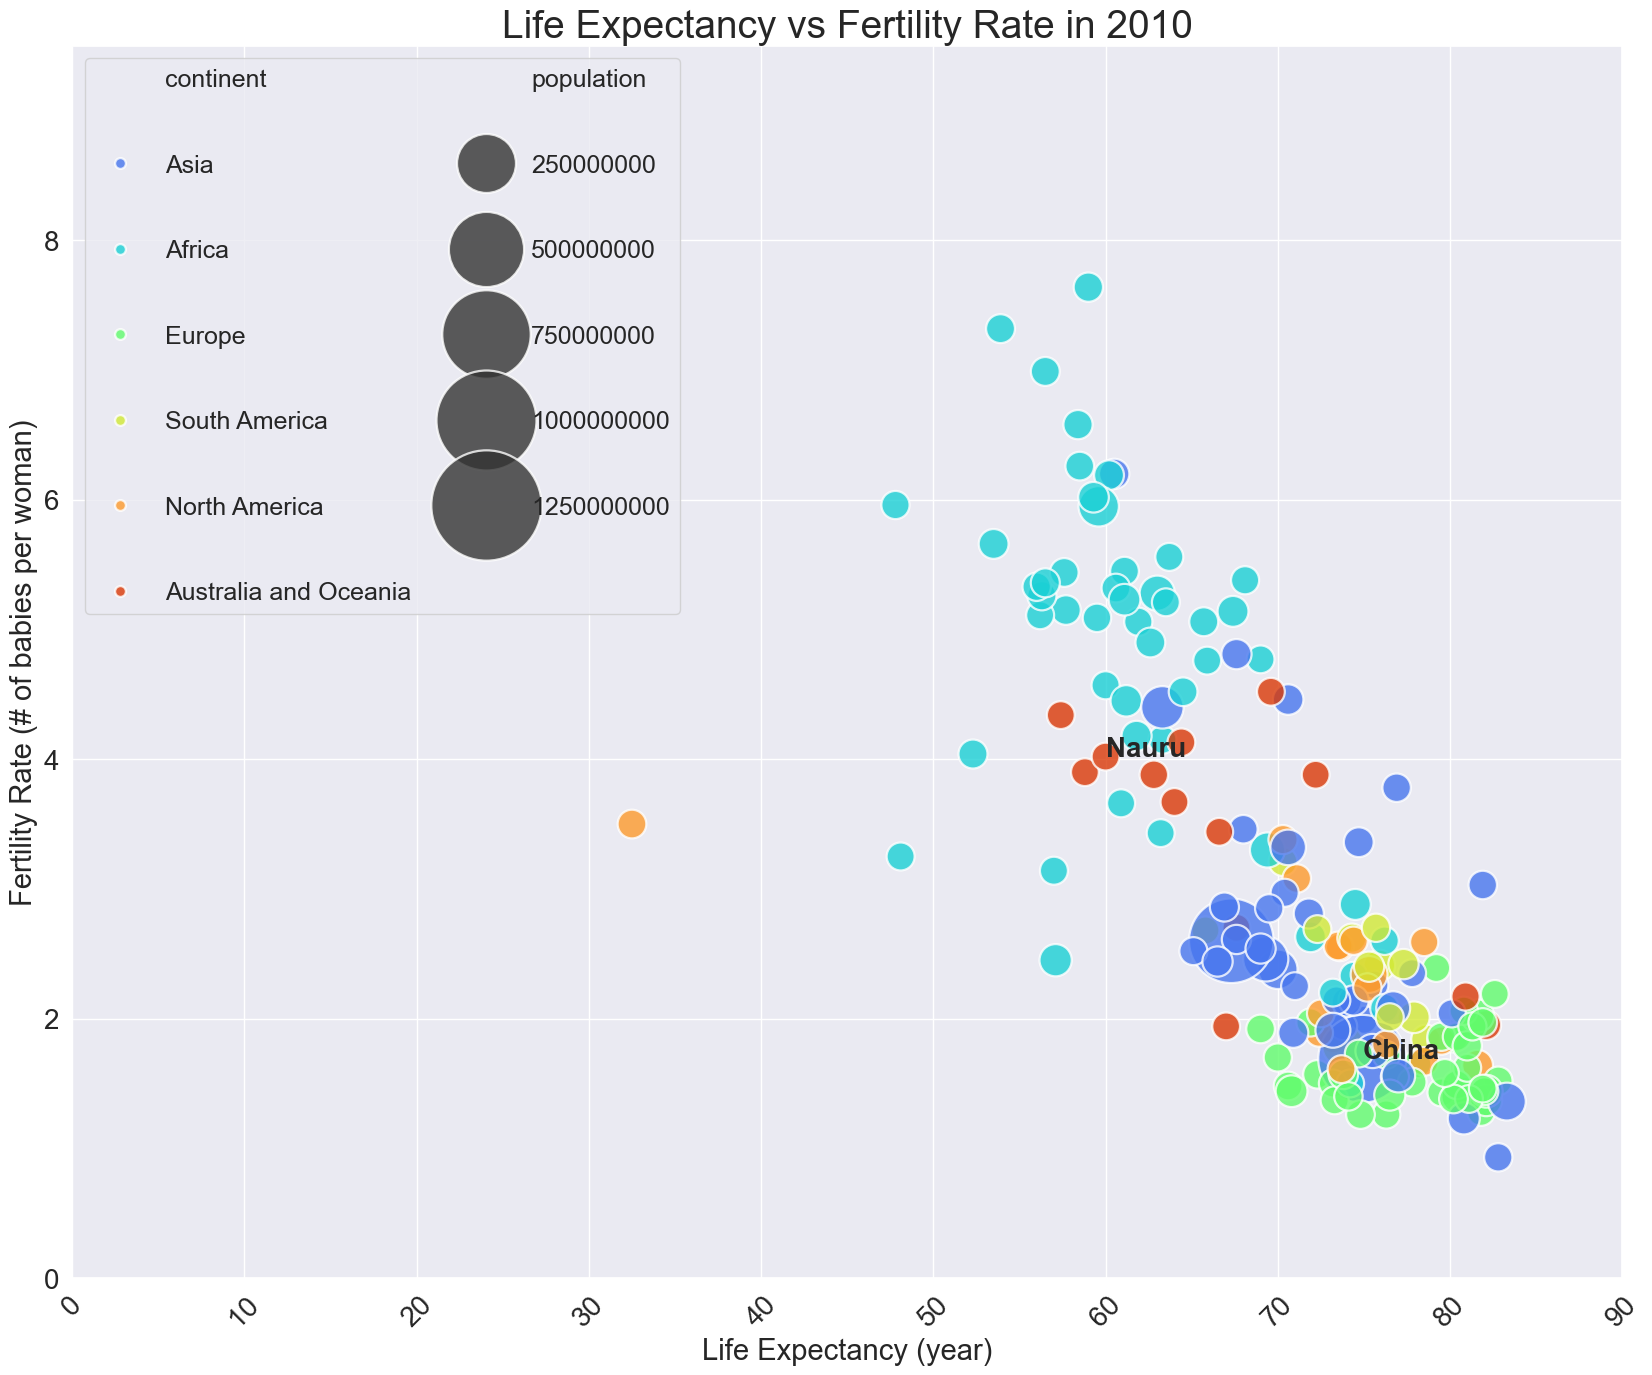

In [9]:
# Visualizing for the year 2010
selected_year = 2010

# Filter the dataset for only 2010
countries_filtered = countries[countries['year'] == selected_year]

# Set the theme and size of the plot
plt.figure(figsize=(20,16))
sns.set_theme(style= 'darkgrid', palette= 'turbo')

# Create the plot, change the title and legend
ax = sns.scatterplot(data= countries_filtered, x= 'life_exp', y= 'fer_rate', hue= 'continent', size= 'population', sizes=(400, 4000), alpha= 0.8)
plt.title(f'Life Expectancy vs Fertility Rate in {selected_year}', fontsize= 28)
plt.legend(labelspacing= 2.5, fontsize= 18, loc= 'upper left', ncol= 2, markerscale= 1.3)

# Change labels and their settings
plt.xlabel('Life Expectancy (year)', fontsize= 21)
plt.xticks(fontsize= 20, rotation= 45)
plt.ylabel('Fertility Rate (# of babies per woman)', fontsize= 21)
plt.yticks(fontsize= 20)
plt.axis([0, 90, 0, 9.5])

# Show country names in the annotation (for countries which have max and min population each year)
max_min = [countries_filtered['population'].max(), countries_filtered['population'].min()]
for i in max_min:    
    x_cor = (countries_filtered.loc[countries_filtered['population'] == i, ['life_exp']].values[0])
    y_cor = (countries_filtered.loc[countries_filtered['population'] == i, ['fer_rate']].values[0])
    text = countries_filtered.loc[countries_filtered['population'] == i, ['country']].values[0][0]
    plt.text(s= text, x= x_cor, y= y_cor, fontsize= 20, weight= 'bold');

### Make an animated plot

In [10]:
# Create a for loop to create one graph for each year and then save them
for year in range(start_year, end_year):
    countries_temp = countries[countries['year'] == year]
    plt.figure(figsize=(40,32))
    sns.set_theme(style= 'darkgrid', palette= 'turbo')
    sns.scatterplot(data= countries_temp, x= 'life_exp', y= 'fer_rate', size= 'population', sizes=(400, 4000), hue= 'continent', alpha= 0.8)
    plt.legend(labelspacing= 2.7, fontsize= 24, loc= 'upper left', markerscale= 2)
    plt.title(f'Life Expectancy vs Fertility Rate in {year}', fontsize= 50)
    plt.xlabel('Life Expectancy (year)', fontsize= 30)
    plt.xticks(fontsize= 30, rotation= 45)
    plt.ylabel('Fertility Rate (# of babies per woman)', fontsize= 30)
    plt.yticks(fontsize= 30)
    plt.axis([0, 90, 0, 9.5])

    max_min = [countries_temp['population'].max(), countries_temp['population'].min()]
    for i in max_min:    
        x_cor = (countries_temp.loc[countries_temp['population'] == i, ['life_exp']].values[0])
        y_cor = (countries_temp.loc[countries_temp['population'] == i, ['fer_rate']].values[0])
        text = countries_temp.loc[countries_temp['population'] == i, ['country']].values[0][0]
        plt.text(s= text, x= x_cor, y= y_cor, fontsize= 32, weight= 'bold')

    plt.savefig(f'images/plot_{year}.png')
    plt.close();

In [11]:
# Combine all years' graphs in a gif and save it
images = []

for year in range(start_year, end_year):
    filename = f'plot_{year}'
    images.append(imageio.v3.imread(f'./images/plot_{year}.png'))

# Save the gif, set the pace of gif with 'fps' parameter
imageio.mimsave(f'./images/animated_plot.png', images, fps= 5)

## Conclusion
Now, our `gif` is ready in the related folder!

In conclusion, the animated scatterplot provides a compelling visualization of the changing relationship between life expectancy, fertility rates and population across different countries. Through this dynamic representation, we can observe significant global trends, such as the general increase in life expectancy and the decline in fertility rates.